<a href="https://colab.research.google.com/github/changsksu/IMSE_Data_Science/blob/main/2k_factorial_curvature_pure_error_LOF_tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Python notebook demonstrates the computation of Two-Level factorial experimental analysis with k=4 and center points. We take the advantage of the polynomial generation feature to generate full dimension of the design matrix x using sklearn PolynomialFeature. The example is from Montgomery Intro to SQC (7th ed chap 13 Ex 13.8 Etch Rate Experiment).  Ref.
https://www.statsmodels.org/stable/regression.html#examples

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html 


In [1]:
import math
import random
import scipy
import statistics
import numpy as np
import scipy.stats
from scipy.special import comb
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import plotly.graph_objects as go
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [2]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#use theread option where the data file is rignt under your default google drive directory
#note that the path is case sensitive
#use a text editor such as notepad to see the seperator dividing data
#go the 1st read option for local file: see the Read data from local file notebook for an example
# Four Factors A-D and the response is Etch Rate
# the run_oder is the order when the combination was experimented which will be used for plotting residuals
# the experiments also include four center points
data = pd.read_csv('drive/My Drive/Colab Notebooks/IMSE_Data_Science/Data/EX 13.8 Etch Rate k=4 cpts.csv', sep=',', na_values=".")

data  

,stand_order,run_order,A_Gap,B_Pressure,C_Flow,D_Power,EtchRate
0,1,10,-1,-1,-1,-1,550
1,2,13,1,-1,-1,-1,669
2,3,7,-1,1,-1,-1,604
3,4,3,1,1,-1,-1,650
4,5,9,-1,-1,1,-1,633
5,6,14,1,-1,1,-1,642
6,7,1,-1,1,1,-1,601
7,8,11,1,1,1,-1,635
8,9,16,-1,-1,-1,1,1037
9,10,4,1,-1,-1,1,749


In [4]:
df=data #df means data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   stand_order  20 non-null     int64
 1   run_order    20 non-null     int64
 2   A_Gap        20 non-null     int64
 3   B_Pressure   20 non-null     int64
 4   C_Flow       20 non-null     int64
 5   D_Power      20 non-null     int64
 6   EtchRate     20 non-null     int64
dtypes: int64(7)
memory usage: 1.2 KB


In [5]:
Xmain=df[['A_Gap', 'B_Pressure', 'C_Flow', 'D_Power']]
Xmain

,A_Gap,B_Pressure,C_Flow,D_Power
0,-1,-1,-1,-1
1,1,-1,-1,-1
2,-1,1,-1,-1
3,1,1,-1,-1
4,-1,-1,1,-1
5,1,-1,1,-1
6,-1,1,1,-1
7,1,1,1,-1
8,-1,-1,-1,1
9,1,-1,-1,1


In [6]:
x1x2x3x4=df['A_Gap'] * df['B_Pressure'] *df['C_Flow'] * df['D_Power']
x1x2x3x4

0     1
1    -1
2    -1
3     1
4    -1
5     1
6     1
7    -1
8    -1
9     1
10    1
11   -1
12    1
13   -1
14   -1
15    1
16    0
17    0
18    0
19    0
dtype: int64

In [7]:
# convert x1 and x2 input columns into a 2nd order polynomial matrix with intercept column 
# computation is done in numpy and convert it into Panda dataframe
xx=Xmain.to_numpy()
poly= PolynomialFeatures(degree=3, interaction_only=True)
xxpd=pd.DataFrame(poly.fit_transform(xx), columns=['I', 'x1', 'x2', 'x3', 'x4','x1x2', 'x1x3', 'x1x4', 'x2x3', 'x2x4', 'x3x4', 'x1x2x3', 'x1x2x4', 'x1x3x4','x2x3x4'])
xxpd['x1x2x3x4']=x1x2x3x4
xxpd

,I,x1,x2,x3,x4,x1x2,x1x3,x1x4,x2x3,x2x4,x3x4,x1x2x3,x1x2x4,x1x3x4,x2x3x4,x1x2x3x4
0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1
1,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1
2,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,-1
3,1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,1
4,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,-1
5,1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,1
6,1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,1
7,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1
8,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1
9,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1


Note that the x1^2 and X2^2 columns are all 1s. This phenomial is due the lack of center points and middle level points in the design matrix X. We will introduce a CCD (central composite design) to take care of it.

In [32]:
# reduce model using main effect and two-way interactions 
# predicted response using skleran LinearRegression fit
#X=xxpd.drop(columns=['I'])
X=xxpd[['x1','x2','x3','x4','x1x2', 'x1x3', 'x1x4', 'x2x3', 'x2x4', 'x3x4']]
Y=df[['EtchRate']]
regr=LinearRegression()
regr.fit(X,Y)
Yhat=regr.predict(X)
Y=Y.to_numpy()
eij=Y-Yhat
print(eij)


[[  0.225]
 [ 34.475]
 [  3.475]
 [-19.525]
 [  4.975]
 [-21.025]
 [  9.975]
 [ 24.725]
 [ 24.725]
 [-40.775]
 [ -9.775]
 [ 44.475]
 [-11.275]
 [ 45.975]
 [ 14.975]
 [-31.025]
 [-65.4  ]
 [ -7.4  ]
 [  8.6  ]
 [-10.4  ]]


In [9]:
# use statsmodels for OLS fitting and t statistics
# in this case, X is xxpd with the first column I
X=xxpd[['I','x1','x2','x3','x4','x1x2', 'x1x3', 'x1x4', 'x2x3', 'x2x4', 'x3x4']]
model = sm.OLS(Y, X)
res=model.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     31.17
Date:                Wed, 27 Oct 2021   Prob (F-statistic):           8.99e-06
Time:                        19:55:28   Log-Likelihood:                -94.612
No. Observations:                  20   AIC:                             211.2
Df Residuals:                       9   BIC:                             222.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I            771.4000      9.144     84.366      0.0

In [10]:
# Reduced model with only factors A, D, and AD 
X=xxpd[['x1','x4','x1x4']]
Y=df[['EtchRate']]
regr2=LinearRegression()
regr2.fit(X,Y)
Yhat2=regr2.predict(X)
X2=xxpd[['I','x1','x4','x1x4']]
model2 = sm.OLS(Y, X2)
res2=model2.fit()
print(res2.summary())

#Yhat

                            OLS Regression Results                            
Dep. Variable:               EtchRate   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     105.9
Date:                Wed, 27 Oct 2021   Prob (F-statistic):           9.14e-11
Time:                        19:55:28   Log-Likelihood:                -99.972
No. Observations:                  20   AIC:                             207.9
Df Residuals:                      16   BIC:                             211.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I            771.4000      8.965     86.044      0.0

In [11]:
#compute the MSE using pure error (i.e. repteated obs at center points)
# this cell verify the result in the next cell
ydata0=[706, 764,780,761]
mse=statistics.variance(ydata0)
print(mse)

1040.9166666666667


In [12]:
#pure error = variance of the center points
from statistics import variance
Ycenter=[df['EtchRate'][df['A_Gap']==0]]
#Ydata0=np.array(Ycenter)
#Yrow=Ydata0[0]
Yrow=np.array(Ycenter)[0]
#MSpe=statistics.variance(Yrow) somehow the output is integer
MSpe=np.var(Yrow, ddof=1) # ddof = 0 gives biased estimator
MSpe

1040.9166666666667

In [13]:
#pure quadratic = nF*nC*(yFbar - yCbar )^2/(nF + nC)
# nF is the number of points in the factorial points and nC is the number of center points
YC=[df['EtchRate'][df['A_Gap']==0]][0]
YF=[df['EtchRate'][df['A_Gap']!=0]][0]
nC=len(YC)
nF=len(YF)
#SSpq is SS pure qudratic or called SS curvature
SSpq=nF*nC*(statistics.mean(YF)-statistics.mean(YC))**2/(nF + nC)
print('SS pure qudratic or curvature', SSpq)

SS pure qudratic or curvature 1739.1125


In [14]:
# to verify the number of points  n* 2^k  for the factorial design
len(YF)

16

In [15]:
# obtain the beta coefficients
beta=regr.coef_
betas=beta.flatten()
betas

array([-50.8125,  -0.8125,   3.6875, 153.0625,  -3.9375, -12.4375,
       -76.8125, -21.9375,  -0.3125,  -1.0625])

In [34]:
#
# reduced model 1 main + 2-way interactions: SS computation
#
# Lack of fit = (SSe - SSpe) the unaccounted error amount after pure error
# F test for lack of fit = MSlof/MSpe
# res.resid is the residuals based on design matrix X which can be a full or reduce model

Y=df[['EtchRate']].to_numpy()
SST = sum(Y**2) - (sum(Y))**2/len(Y)

# all SS terms of main and 2-way interactions summed for SSR
SSR=sum(betas[0:10]**2) * len(YF)
DFm= 4
DFR = DFm + comb(DFm, 2) 
print("SS Model (reduce model 1)", SSR, "DF=", int(DFR))
SSe=SST-SSR
DFe = len(Y)-1 - DFR
print("SS Residual",SSe, "DF=", int(DFe))
SSpe = MSpe * (len(Yrow)-1)
SSlof = SSe - SSpe
DFlof=int(DFe - (len(YC)-1))
print('    SS lack of fit', SSlof, "DF=", DFlof)
print("    SS pure error", SSpe, "DF=", len(YC)-1)

print("SS Total", SST, "DF=", len(Y)-1)

SS Model (reduce model 1) 521234.1250000001 DF= 10
SS Residual [15048.675] DF= 9
    SS lack of fit [11925.925] DF= 6
    SS pure error 3122.75 DF= 3
SS Total [536282.8] DF= 19


In [33]:
# reduced model: main + 2 way interaction + curvature + residual error
# see the disscussion in Montegomery 7ed Intro to SQC Example 13.9 Table 13.19
# contrast = n * 2^k * beta
from scipy.special import comb
contrast = len(YF) * betas
#print(contrast)

# SS = contrast^2 / n * 2^k
SSmodel= contrast**2 / len(YF)
#print(SSmodel)
# note that the index 4 is not included in the computation
SSmain=sum(SSmodel[0:4])
DFm= 4
print("SS main effect           >", SSmain, "DF=", DFm)

SStwoint=sum(SSmodel[4:10])
DF2w=comb(DFm, 2)
print("SS Two-Way Interactions  >", SStwoint, "DF=", int(DF2w))

print("SS Curvature  >", SSpq, "DF=", 1)

SShiint=sum(SSmodel[10:]) 

SSe=SST-SSmain -SStwoint - SSpq
SSlof = SSe - SSpe
DFRes=len(Y)-1-DFm-int(DF2w)-1
DFpe=len(YC)-1
DFlof= DFRes - DFpe

print("SS Residual error        >", SSe, "DF=", DFRes)
print('SS lack of fit           >', SSlof, "DF=", DFlof )
print('SS pure error            >', SSpe, "DF=", DFpe)
print('SS Total                 >', SST, "DF=", len(Y)-1)

SS main effect           > 416388.75 DF= 4
SS Two-Way Interactions  > 104845.37500000009 DF= 6
SS Curvature  > 1739.1125 DF= 1
SS Residual error        > [13309.5625] DF= 8
SS lack of fit           > [10186.8125] DF= 5
SS pure error            > 3122.75 DF= 3
SS Total                 > [536282.8] DF= 19


In [21]:
# Lack of Fit test: F0= MSlof/MSpe
from scipy.stats import f
MSlof=(SSlof/DFlof)
MSpe=(SSpe/(len(YC)-1))
F0=MSlof/MSpe
print("MSlof, MSpe, F0", MSlof, MSpe, F0)
pval=1-f.cdf(F0, DFlof, len(YC)-1)
print("pvalue of F0=", pval)
                    


MSlof, MSpe, F0 [2037.3625] 1040.9166666666667 [1.95727724]
pvalue of F0= [0.30791344]


In [22]:
# Curvature Test
MScuvature=SSpq/1
MSe=SSe/DFRes
F0=MScuvature/MSe
print("MScurvature, MSe, F0", MScuvature, MSe, F0)
pval=1-f.cdf(F0, 1, DFRes)
print("pvalue of F0=", pval)


MScurvature, MSe, F0 1739.1125 [1663.6953125] [1.04533113]
pvalue of F0= [0.3365043]


In [23]:
#
# Reduced model 2 with A, D, and AD
#

#SSA= sum((betas[0:3]**2) * len(YF))
SSA= (betas[0]**2) * len(YF)


SSD= (betas[3]**2) * len(YF)

SSAD= (betas[6]**2) * len(YF)

# all SS terms summed
SSR=SSA+SSD+SSAD
print("SS Model >", SSR, "DF=", 3)
print("   SSA", SSA, "DF=1")
print('   SSD', SSD, "DF=1")
print("   SSAD", SSAD, "DF=1")
SST = sum(Y**2) - (sum(Y))**2/len(Y)

SSe2=SST-SSR
print("SS Residual error",SSe2, "DF=", len(Y)-1-3)
print("SS Total",SST, "DF=", len(Y)-1)



SS Model > 510563.1875000001 DF= 3
   SSA 41310.562500000015 DF=1
   SSD 374850.0625 DF=1
   SSAD 94402.5625000001 DF=1
SS Residual error [25719.6125] DF= 16
SS Total [536282.8] DF= 19


from the t tests above, the significant factors are

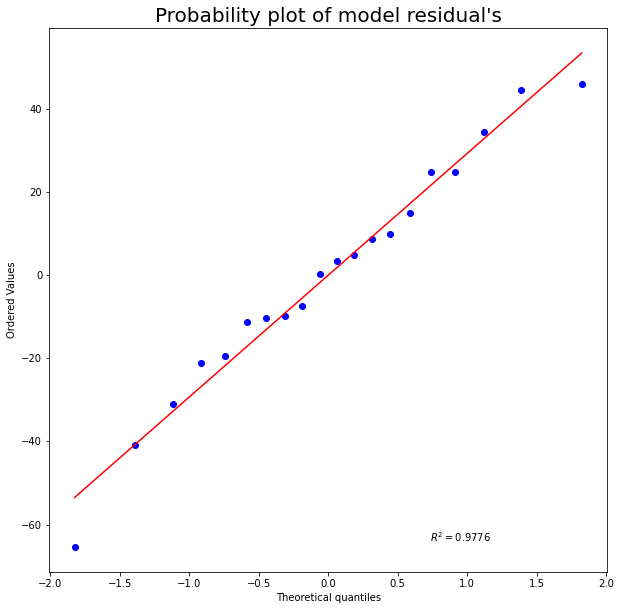

In [24]:
# Residual Analysis of the reduced model
# normal check

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(res.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

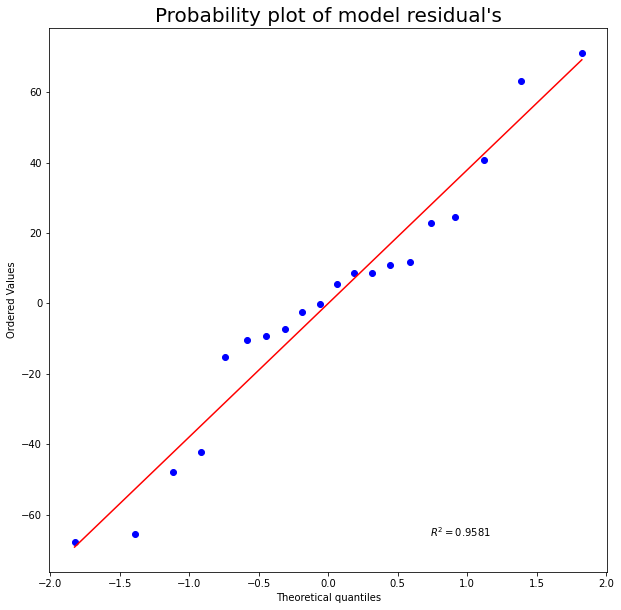

In [35]:
# Residual Analysis of the reduced model 2
# normal check

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(res2.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

The above probably plot shows that the residuals are not normal 

In [25]:
# Homogeneity of Variance check for Factor A
# if the p value is small, reject H0 that the residuals have equal variance
# if the p value is large, cannot reject H0

stats.levene(df['EtchRate'][df['A_Gap'] == -1],
             df['EtchRate'][df['A_Gap'] == 1])
            

LeveneResult(statistic=49.13441332422498, pvalue=6.15384201158034e-06)

Since p value is very large, we fail to reject that factor A has equal variance

In [36]:
# Homogeneity of Variance check for Factor D
# if the p value is small, reject H0 that the residuals have equal variance
# if the p value is large, cannot reject H0

stats.levene(df['EtchRate'][df['D_Power'] == -1],
             df['EtchRate'][df['D_Power'] == 1])

LeveneResult(statistic=22.076979601574614, pvalue=0.0003420853626576388)

Since p value is very large, we fail to reject that factor A has equal variance

The p value of the Levene is very large. We don't have evidence to conclude that the variances from different primer type are different

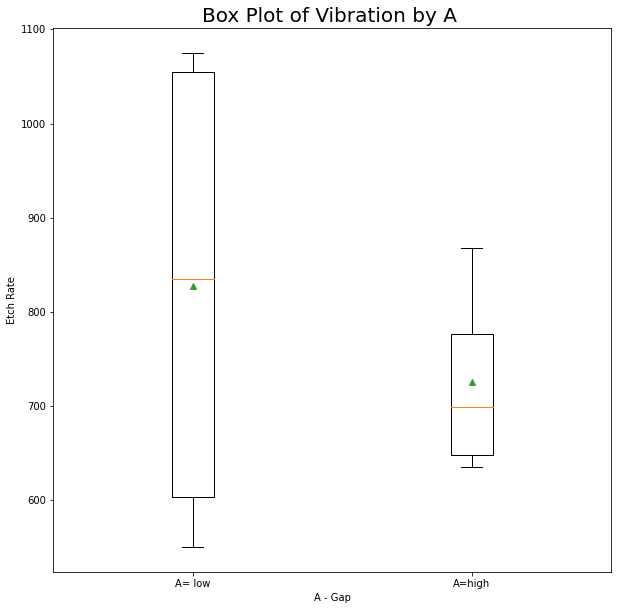

In [27]:
# Box plots by factor A'
# If the IRQ=75% quartitle - 25% quartile are very different, then question the constant variance assumption
# If the F test p value is very small, we reject H0 and can use this box plot to identify the best factor level

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Vibration by A ", fontsize= 20)
ax.set

data2 = [df['EtchRate'][df['A_Gap'] == -1],
             df['EtchRate'][df['A_Gap'] == 1]]


ax.boxplot(data2,
           labels= ['A= low', 'A=high'],
           showmeans= True)

plt.xlabel("A - Gap")
plt.ylabel("Etch Rate")

plt.show()

There is not much difference in variation. The largest adhesion strength is due to type 2 primer type.

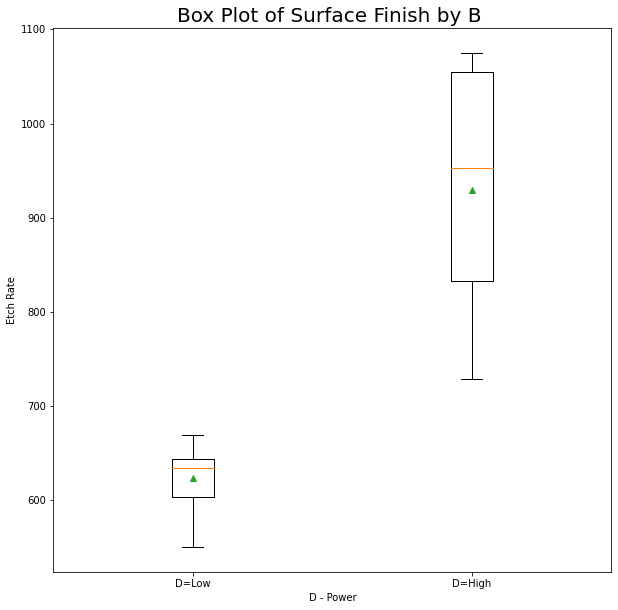

In [28]:
# Box plots by factor D
# same instruction as the previous factor 

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Surface Finish by B ", fontsize= 20)
ax.set

data2 = [df['EtchRate'][df['D_Power'] == -1],
         df['EtchRate'][df['D_Power'] == +1]]


ax.boxplot(data2,
           labels= ['D=Low', 'D=High'],
           showmeans= True)

plt.xlabel("D - Power")
plt.ylabel("Etch Rate")

plt.show()

There is not much difference in variation by application method. The largest adhesion strength is due to spraying method.

In [29]:
# testing the random order for collecting observations 
# Minitab calls the order variable, run order
# the following code generate a random order
# you should conduct your experiments using the random order generated
# for example, the first number is 5, it means that you will run the setting 5 in the experimentation table
# observation label 5 is primier type 3 and application method 2 (spraying)
# the run observation 11 and so on until all observations are collected
# import random (see the first cell)
N = len(Y)
#c = list(range(0, N))
#xorder = random.sample(c, N) # this should be replaced by the exact run order if the random order is not used

order=df[['run_order']]
order=order.to_numpy() 
#the following step reduces the index in run_order by 1 so that the python index from 0 can function properly
order2=np.zeros(N) #order 2 is a list of zero
for i in range(N):
    order2[i]=order[i]-1 #assign the value of element in an array into the list


print('order of observations/residuals is')
print(order2)
# convert the array into a list for indexing
#order=order.reshape((1,N))
#order=order.tolist()
#print(order)



order of observations/residuals is
[ 9. 12.  6.  2.  8. 13.  0. 10. 15.  3. 14. 11.  5.  4.  7.  1. 16. 17.
 18. 19.]


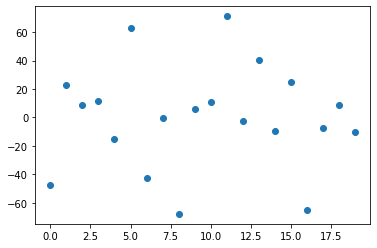

In [37]:
# Use the run order to reflect the sequence that we collected the data 
# if there is no pattern in the scatter plot, then don't reject independence assumption

eij=res2.resid

x = range(0,N) # from the first collected obs to the last in order
y = eij[order2] # assign run order (see the previous code box)

plt.scatter(x, y)

The random order from the scatter plot above shows no pattern. If the data in the first half of the experiments are lower than 0 while those of the second half are above 0. Then there is a bias in data collection. If the residuals are small in the beginning but graduately increase. Or vice versa. It is a concern as well. In these cases, independence assumption is violated.
Your Turn: Try the same plot on res.resid for the reduced model 1. The above figure is for reduced model 2 (A + D +AD)